In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct
import sys
import time
from model.FittingTree import *
from model.MET import *
from model.MET_Meta import *
from model.FT_Meta import *

In [3]:
# Real World Data
# 'd' for double, 'l' for uint
datafile = open('./data/iot_unix.uint64','rb')
data = datafile.read(8)
data_len, = struct.unpack('l', data)
data_len = int(data_len)
data=[]
for i in tqdm(range(data_len)):
    data_bin = datafile.read(8)
    data_unix, = struct.unpack('l',data_bin)
    data.append(data_unix)

100%|██████████| 15190092/15190092 [00:10<00:00, 1402550.29it/s]


In [4]:
epsilon_list = list(range(25,400,25))
FT_Index_seg_num = []
FT_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    FT_Index = FT(epsilon)
    FT_Index.learn_index(data)
    FT_Index_seg_num.append(FT_Index.seg_num)
    FT_Index_mae.append(FT_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  0%|          | 70039/15190092 [00:00<00:21, 700389.00it/s]

35154 7.098442787574953


  0%|          | 70748/15190092 [00:00<00:21, 707478.99it/s]

16073 14.04331981662784


  0%|          | 70684/15190092 [00:00<00:21, 706837.30it/s]

11202 21.28198440141113


  0%|          | 71377/15190092 [00:00<00:21, 710879.23it/s]

8505 28.5182852743749


  0%|          | 70206/15190092 [00:00<00:21, 702059.00it/s]

6773 35.46058364886796


  0%|          | 72348/15190092 [00:00<00:20, 723472.07it/s]

5677 42.480276024661336


  0%|          | 70904/15190092 [00:00<00:21, 709037.30it/s]

4813 49.71426657587064


100%|██████████| 15190092/15190092 [00:20<00:00, 742357.40it/s]


4158 56.81930649267957


  0%|          | 37541/15190092 [00:00<00:40, 375404.99it/s]

3739 63.955924559245595


  0%|          | 70858/15190092 [00:00<00:21, 708577.30it/s]

3419 71.50314869719024


  0%|          | 37957/15190092 [00:00<00:40, 371083.99it/s]

3140 79.56361607289804


  0%|          | 72688/15190092 [00:00<00:21, 716373.27it/s]

2884 86.79800069676998


  0%|          | 72746/15190092 [00:00<00:21, 717059.46it/s]

2684 93.9960264230131


  0%|          | 72526/15190092 [00:00<00:20, 725245.13it/s]

2528 100.83687926314073


100%|██████████| 15190092/15190092 [00:23<00:00, 635424.71it/s]

2393 108.094972828341


-21.755667444815238

In [5]:
epsilon_list = list(range(25,400,25))
FT_Meta_Index_seg_num_withBound = []
FT_Meta_Index_mae_withBound = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    FT_Meta_Index = FT_Meta(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
    FT_Meta_Index.learn_index_lookahead(data)
    FT_Meta_Index_seg_num_withBound.append(FT_Meta_Index.seg_num)
    FT_Meta_Index_mae_withBound.append(FT_Meta_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  0%|          | 0/15190092 [00:00<?, ?it/s]

19716 8.69296413741273


100%|██████████| 15190092/15190092 [00:25<00:00, 599157.16it/s]


10951 17.53722933343656


  0%|          | 0/15190092 [00:00<?, ?it/s]

7602 26.119442989548713


  0%|          | 0/15190092 [00:00<?, ?it/s]

5895 34.15148479680044


  0%|          | 0/15190092 [00:00<?, ?it/s]

5024 40.933167751716056


  0%|          | 0/15190092 [00:00<?, ?it/s]

4436 46.42105604100357


  0%|          | 0/15190092 [00:00<?, ?it/s]

3995 53.36717697299002


100%|██████████| 15190092/15190092 [00:25<00:00, 596868.19it/s]


3637 61.22911447804266


100%|██████████| 15190092/15190092 [00:25<00:00, 584580.64it/s]


3370 68.2908329324141


  0%|          | 0/15190092 [00:00<?, ?it/s]

3166 74.24539476126938


100%|██████████| 15190092/15190092 [00:23<00:00, 636589.65it/s]


2961 82.68748852870674


  0%|          | 0/15190092 [00:00<?, ?it/s]

2784 89.96062051500412


  0%|          | 0/15190092 [00:00<?, ?it/s]

2652 98.28878600603603


  0%|          | 0/15190092 [00:00<?, ?it/s]

2480 105.57547097147273


100%|██████████| 15190092/15190092 [00:23<00:00, 635684.67it/s]

2363 114.24561246896991


-26.479462322841087

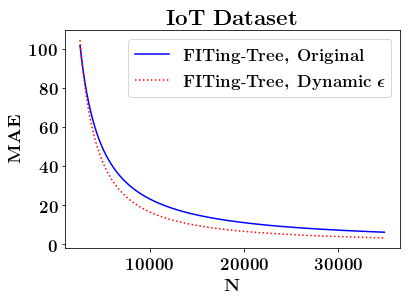

In [9]:
x = np.arange(2500,35000)
import matplotlib.pylab as pylab
label_size = 18.5
ticks_size = 17
title_size = 22.5
legend_size = 17
params = {'legend.fontsize': legend_size,
          'axes.labelsize': label_size,
          'axes.titlesize': title_size,
          'xtick.labelsize': ticks_size,
          'ytick.labelsize': ticks_size}
pylab.rcParams.update(params)
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('$\mathrm{IoT~Dataset}$')
plt.xlabel('$\mathrm{N}$')
plt.ylabel('$\mathrm{MAE}$')
plt.xticks()
plt.yticks()
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,FT_Index_seg_num,FT_Index_mae)
p2,_ = curve_fit(func,FT_Meta_Index_seg_num_withBound,FT_Meta_Index_mae_withBound)
#p3,_ = curve_fit(func,PGM_Index_seg_num,PGM_Index_mae)
#p4,_ = curve_fit(func,FT_Meta_Index_seg_num_withBound,FT_Meta_Index_mae_withBound)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='$\mathrm{FITing\mbox{-}Tree,~Original}$')
#plt.scatter(FT_Index_seg_num, FT_Index_mae,c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='$\mathrm{FITing\mbox{-}Tree,~Dynamic~\epsilon}$')
#plt.scatter(FT_Meta_Index_seg_num_withBound, FT_Meta_Index_mae_withBound,c=colors[1],marker=markers[1])
plt.legend()
#plt.savefig("{}.pdf".format("results/FITingTree/IoT_tradeoff_30"), bbox_inches='tight', pad_inches=0)

In [7]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
#AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC1,AUC2,1-AUC2/AUC1

(606078.7358740575, 451201.11530189356)

In [40]:
FT_Index = FT(16)
FT_Index.learn_index(data)
FT_Index.mae * data_len / FT_Index.seg_num

100%|██████████| 15190092/15190092 [00:20<00:00, 725229.84it/s]

59237 4.532447289489754


1162.2514866130966

In [42]:
init_epsilon = range(10,100,10)
FT_Meta_Index = FT_Meta(16,init_epsilon=init_epsilon,low=1,high=1000,withBound=True)
FT_Meta_Index.learn_index_lookahead(data,lookn=400)

100%|██████████| 15190092/15190092 [00:23<00:00, 657167.40it/s]

33761 5.323595933454517


In [43]:
oracle_epsilon = FT_Meta_Index.seg_epsilon[len(init_epsilon):]
file = open('../data/input/iot_16.double','wb')
oracle_epsilon_len = len(oracle_epsilon)
oracle_epsilon_len_bin = struct.pack('d',oracle_epsilon_len)
file.write(oracle_epsilon_len_bin)
for i in range(oracle_epsilon_len):
    oracle_epsilon_bin = struct.pack('d',oracle_epsilon[i])
    file.write(oracle_epsilon_bin)
file.close()

In [5]:
FT_Random_Index_seg_num = []
FT_Random_Index_mae = []
starttime = time.perf_counter()
epsilon_high_list = list(range(50,700,100))
for i in range(len(epsilon_high_list)):
    FT_Random_Index = FT_Random(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=epsilon_high_list[i],withBound=True)
    FT_Random_Index.learn_index_lookahead(data)
    FT_Random_Index_seg_num.append(FT_Random_Index.seg_num)
    FT_Random_Index_mae.append(FT_Random_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  0%|          | 0/15190092 [00:00<?, ?it/s]

33633 9.12235357099878


  0%|          | 0/15190092 [00:00<?, ?it/s]

11081 27.215242343496012


  0%|          | 0/15190092 [00:00<?, ?it/s]

6563 45.56727497107983


  0%|          | 0/15190092 [00:00<?, ?it/s]

4630 65.56132859498152


  0%|          | 0/15190092 [00:00<?, ?it/s]

3739 84.37365869805133


  0%|          | 0/15190092 [00:00<?, ?it/s]

3159 104.07538130776298


100%|██████████| 15190092/15190092 [00:20<00:00, 730850.65it/s]

2766 121.89026458825924


-10.270834084848563

In [11]:
FT_Poly_Index_seg_num = []
FT_Poly_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    FT_Poly_Index = FT_Poly(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
    FT_Poly_Index.learn_index_lookahead(data)
    FT_Poly_Index_seg_num.append(FT_Poly_Index.seg_num)
    FT_Poly_Index_mae.append(FT_Poly_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  0%|          | 0/15190092 [00:00<?, ?it/s]

63104 4.373363637297259


  0%|          | 0/15190092 [00:00<?, ?it/s]

15353 14.695450099973062


100%|██████████| 15190092/15190092 [03:12<00:00, 78785.95it/s]


11658 20.254822485604432


  0%|          | 0/15190092 [00:00<?, ?it/s]

9669 25.54734237290992


  0%|          | 0/15190092 [00:00<?, ?it/s]

7910 30.74852588121257


  0%|          | 0/15190092 [00:00<?, ?it/s]

6293 38.31204636548613


100%|██████████| 15190092/15190092 [01:25<00:00, 177003.29it/s]


5160 46.61103191475075


100%|██████████| 15190092/15190092 [01:44<00:00, 145429.43it/s]


4515 52.49808671336553


100%|██████████| 15190092/15190092 [01:53<00:00, 133322.27it/s]


3789 62.86967386372643


100%|██████████| 15190092/15190092 [01:53<00:00, 134108.71it/s]


3555 68.99526493980419


100%|██████████| 15190092/15190092 [01:09<00:00, 217102.43it/s]


3275 75.85803272290912


100%|██████████| 15190092/15190092 [00:45<00:00, 330526.88it/s]


3029 82.32500843312864


100%|██████████| 15190092/15190092 [00:52<00:00, 291339.58it/s]


2795 90.24854865921813


  2%|▏         | 279317/15190092 [00:00<00:27, 535345.19it/s]


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [7]:
FT_LS_Index_seg_num = []
FT_LS_Index_mae = []
starttime = time.perf_counter()
for i in range(1,len(epsilon_list)):
    FT_LS_Index = FT_LS(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=1000,withBound=True)
    FT_LS_Index.learn_index_lookahead(data)
    FT_LS_Index_seg_num.append(FT_LS_Index.seg_num)
    FT_LS_Index_mae.append(FT_LS_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  0%|          | 0/15190092 [00:00<?, ?it/s]

18593 9.45983658295157


100%|██████████| 15190092/15190092 [12:19<00:00, 20530.12it/s]


13310 13.790831484101611


100%|██████████| 15190092/15190092 [06:20<00:00, 39949.95it/s]


8118 25.08740875302138


  0%|          | 0/15190092 [00:00<?, ?it/s]

7578 25.89724960191156


  0%|          | 0/15190092 [00:00<?, ?it/s]

6771 28.881308816299466


  0%|          | 0/15190092 [00:00<?, ?it/s]

4891 43.32340857448395


  0%|          | 0/15190092 [00:00<?, ?it/s]

4152 54.91397254210179


  0%|          | 0/15190092 [00:00<?, ?it/s]

4262 48.81837404276419


  0%|          | 0/15190092 [00:00<?, ?it/s]

3968 53.67059363432427


  0%|          | 0/15190092 [00:00<?, ?it/s]

3699 59.88030210745267


100%|██████████| 15190092/15190092 [02:54<00:00, 87144.60it/s] 


3442 65.64268754922617


  0%|          | 0/15190092 [00:00<?, ?it/s]

3307 69.49450352242765


  0%|          | 0/15190092 [00:00<?, ?it/s]

3160 74.44815976098104


100%|██████████| 15190092/15190092 [01:53<00:00, 134303.55it/s]

3008 81.29375852364818


-393.19173832684754

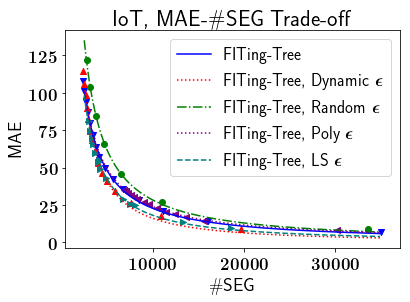

In [12]:
plt.rcParams["text.usetex"] = True
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('IoT, MAE-\#SEG Trade-off')
plt.xlabel('\#SEG')
plt.ylabel('MAE')
x = np.arange(2500,35000)
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,FT_Index_seg_num,FT_Index_mae)
p2,_ = curve_fit(func,FT_Meta_Index_seg_num_withBound,FT_Meta_Index_mae_withBound)
p3,_ = curve_fit(func,FT_Random_Index_seg_num,FT_Random_Index_mae)
p4,_ = curve_fit(func,FT_Poly_Index_seg_num,FT_Poly_Index_mae)
p5,_ = curve_fit(func,FT_LS_Index_seg_num,FT_LS_Index_mae)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='FITing-Tree')
plt.scatter(FT_Index_seg_num, FT_Index_mae,c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='FITing-Tree, Dynamic $\epsilon$')
plt.scatter(FT_Meta_Index_seg_num_withBound, FT_Meta_Index_mae_withBound,c=colors[1],marker=markers[1])
plt.plot(x,p3[0]*x**p3[1],c=colors[2], linestyle=linestyles[2], label='FITing-Tree, Random $\epsilon$')
plt.scatter(FT_Random_Index_seg_num, FT_Random_Index_mae,c=colors[2],marker=markers[2])
plt.plot(x,p4[0]*x**p4[1],c=colors[3], linestyle=linestyles[3], label='FITing-Tree, Poly $\epsilon$')
plt.scatter(FT_Poly_Index_seg_num, FT_Poly_Index_mae,c=colors[3],marker=markers[3])
plt.plot(x,p5[0]*x**p5[1],c=colors[4], linestyle=linestyles[4], label='FITing-Tree, LS $\epsilon$')
plt.scatter(FT_LS_Index_seg_num, FT_LS_Index_mae,c=colors[4],marker=markers[4])
plt.legend()

In [13]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC4 = calc_AUC(x,p4[0]*x**p4[1])
AUC5 = calc_AUC(x,p5[0]*x**p5[1])
AUC_list = [AUC1,AUC2,AUC3,AUC4,AUC5]
for i in range(2,5):
    print(AUC_list[i]/AUC_list[1]-1)

0.6811846515677233
0.405563155096748
0.09319841676986296
